In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples = 10000, n_classes = 2, n_features = 3, n_redundant = 0, random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6)

lr = LogisticRegression()
lr.fit(X_train, y_train)


print(X_train.shape, X_test.shape)


(6000, 3) (4000, 3)


# Performance Measures


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, plot_confusion_matrix

In [21]:
accuracy_score(y_test, lr.predict(X_test), normalize = True) # accuracy, number (or porportion) predition is right

# this is not good measure if there is imbalnaced dataset, high accuracy doesnt mean anything

0.87175

f1_score(y_test, lr.predict(X_test)) # f1 on the other hand is pretty good

## Confusion Matrix


| TN | FN |
|----|----|
| FP | TP |


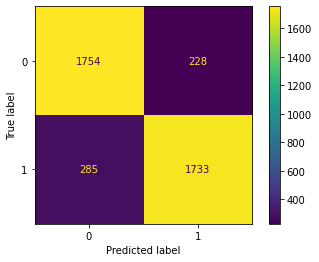

In [35]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lr.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Precision / Recall

Precision is a measure on how well we predict correct positive, minimising false positives. 

$Precision = \frac{TP}{TP + FP}$

Recall is how many positive that we have detected, maximising detections

$Recall = \frac{TP}{TP + FN}$

Precision and Recall are usually trade offs, when tring to predict and capture all positives (reduce false negatives), we will not be able to avoid false positives.



In [38]:
from sklearn.metrics import precision_score, recall_score

ps = precision_score(y_test, lr.predict(X_test))
rs = recall_score(y_test, lr.predict(X_test))

print(ps, rs)

0.8837327893931668 0.8587710604558969


In [43]:
1733/(1733+228) # Precision

0.8837327893931668

In [46]:
1733/(1733+285) # Recall

0.8587710604558969

In [41]:
cm

array([[1754,  228],
       [ 285, 1733]])

In [42]:
len(y_test)

4000

In [60]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict


y_scores = cross_val_predict(lr, X_train, y_train, cv = 3, method = "decision_function") # get all the scores

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

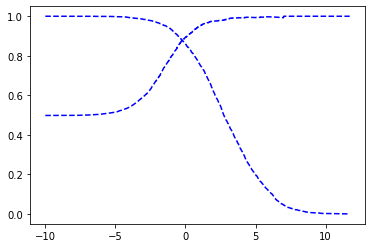

In [62]:
from matplotlib import pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "b--", label = "Recall")
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [57]:
len(precisions)

6001